****
Here, I am working with Real Estate dataset. at very I am doing Data Analysis , data Data visualization , treating null values
in the columns , detecting and removing outliers from the data set.(This part is called data cleaning)

After cleaning the data I applied 3 Machine Learning ALgorithm:
1: LINEAR REGRESSION MODEL (with or without standardization ) , Accuracy= 63%
2: DECISION TREE REGRESSION , Accuracy = 72%
3: RANDOM FOREST REGRESSOR , Accuracy = 81%

In [1]:
# Importing Libraries like numpy for mathematical calculation, pandas for dataframes, matplotlib for drawing data graps etc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from pandas.plotting import scatter_matrix

In [2]:
# Reading the Real Estate.csv data into notebook.

In [3]:
real=pd.read_csv("Real Estate.csv")
real

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


## Data Analysis and visualization.......

In [4]:
real.shape # total no of rows and cols.

(20640, 10)

In [5]:
real.size # total no of elements in data set

206400

In [6]:
real.head() # printing top 5 rows from dataset.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [7]:
real.tail() # printing last 5 rows from dataset.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [8]:
real.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

So,till now we understand that the last col in dataset which is " median_house_value " values are continous so, it is a regression problem and theri is one Categorica Col.
Categorical Cols are those which can further be categorised into multiple categories based on thier values..
so, here the Categorical feature/column is " ocean_proximity ".

In [9]:
# Using Distribution Plot to get a sense how the variables are distributed.

2635.7630813953488

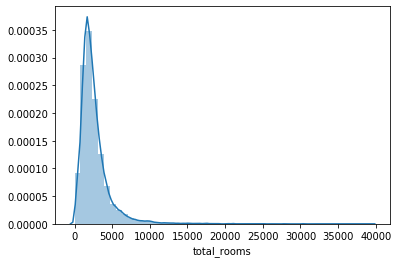

In [10]:
sns.distplot(real['total_rooms']) # by default the distribution plot uses histogram and fit a KDE(kernal density estimate)on it.
real['total_rooms'].mean()# the middle of the bell curve of distplot will give mean of the col here we can see mena is 2635. when we compare with the graph value it'll be the same.

28.639486434108527

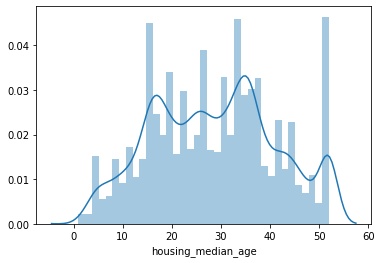

In [11]:
sns.distplot(real['housing_median_age']) # as we can see in the graph the data of the 'housing_median_age' is distributed soo much as I understand that the data is cahging form 18 to 35 as median age.
real['housing_median_age'].mean()

mean value:  3.8706710029070246
maximum value:  15.0001
minimum value 0.4999


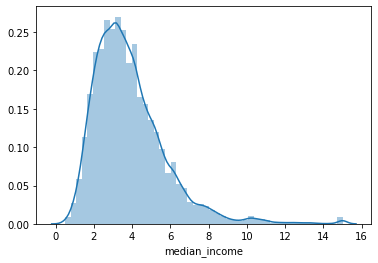

In [12]:
sns.distplot(real['median_income']) # as we can see in the graph the data is uniformaly distributed and we can see the clear bell curve is formaing in the data
print("mean value: ",real['median_income'].mean())
print("maximum value: ",real['median_income'].max()) # as their may be some outliers in the 'median_income' col because with the 
# max() it is showing maximum value is 15.0001 and when we look at the graph the maximum value is more than 25.
print("minimum value",real['median_income'].min())

206855.81690891474

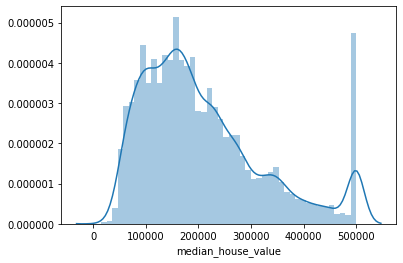

In [13]:
sns.distplot(real['median_house_value'])
real['median_house_value'].mean()

In [14]:
# As we know we have one categorical col in our Data Set which is " ocean_proximity " so,for categorical col 
# we can't use Distribution Plot. For this we will use some other plols.

In [15]:
real.head(0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


In [16]:
real['ocean_proximity'].value_counts() # Here we can see that ocean_proximity has 5 categories

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

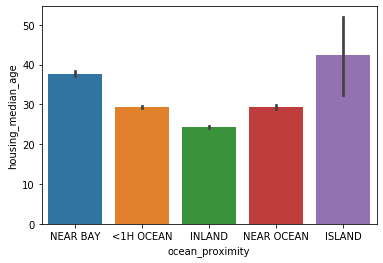

In [17]:
figsize=(25,25)
sns.barplot(x='ocean_proximity',y='housing_median_age',data=real )# so, from the bar we can understand that housing age is more 
# in ISLAND(which is 43 )  as compared to others categories.


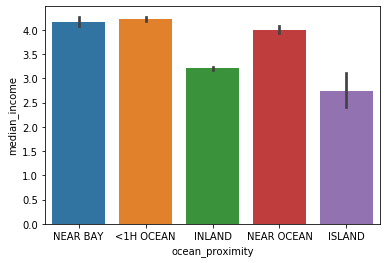

In [18]:
figsize=(25,25)
sns.barplot(x='ocean_proximity',y='median_income',data=real)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019736EF6CC8>,
      dtype=object)

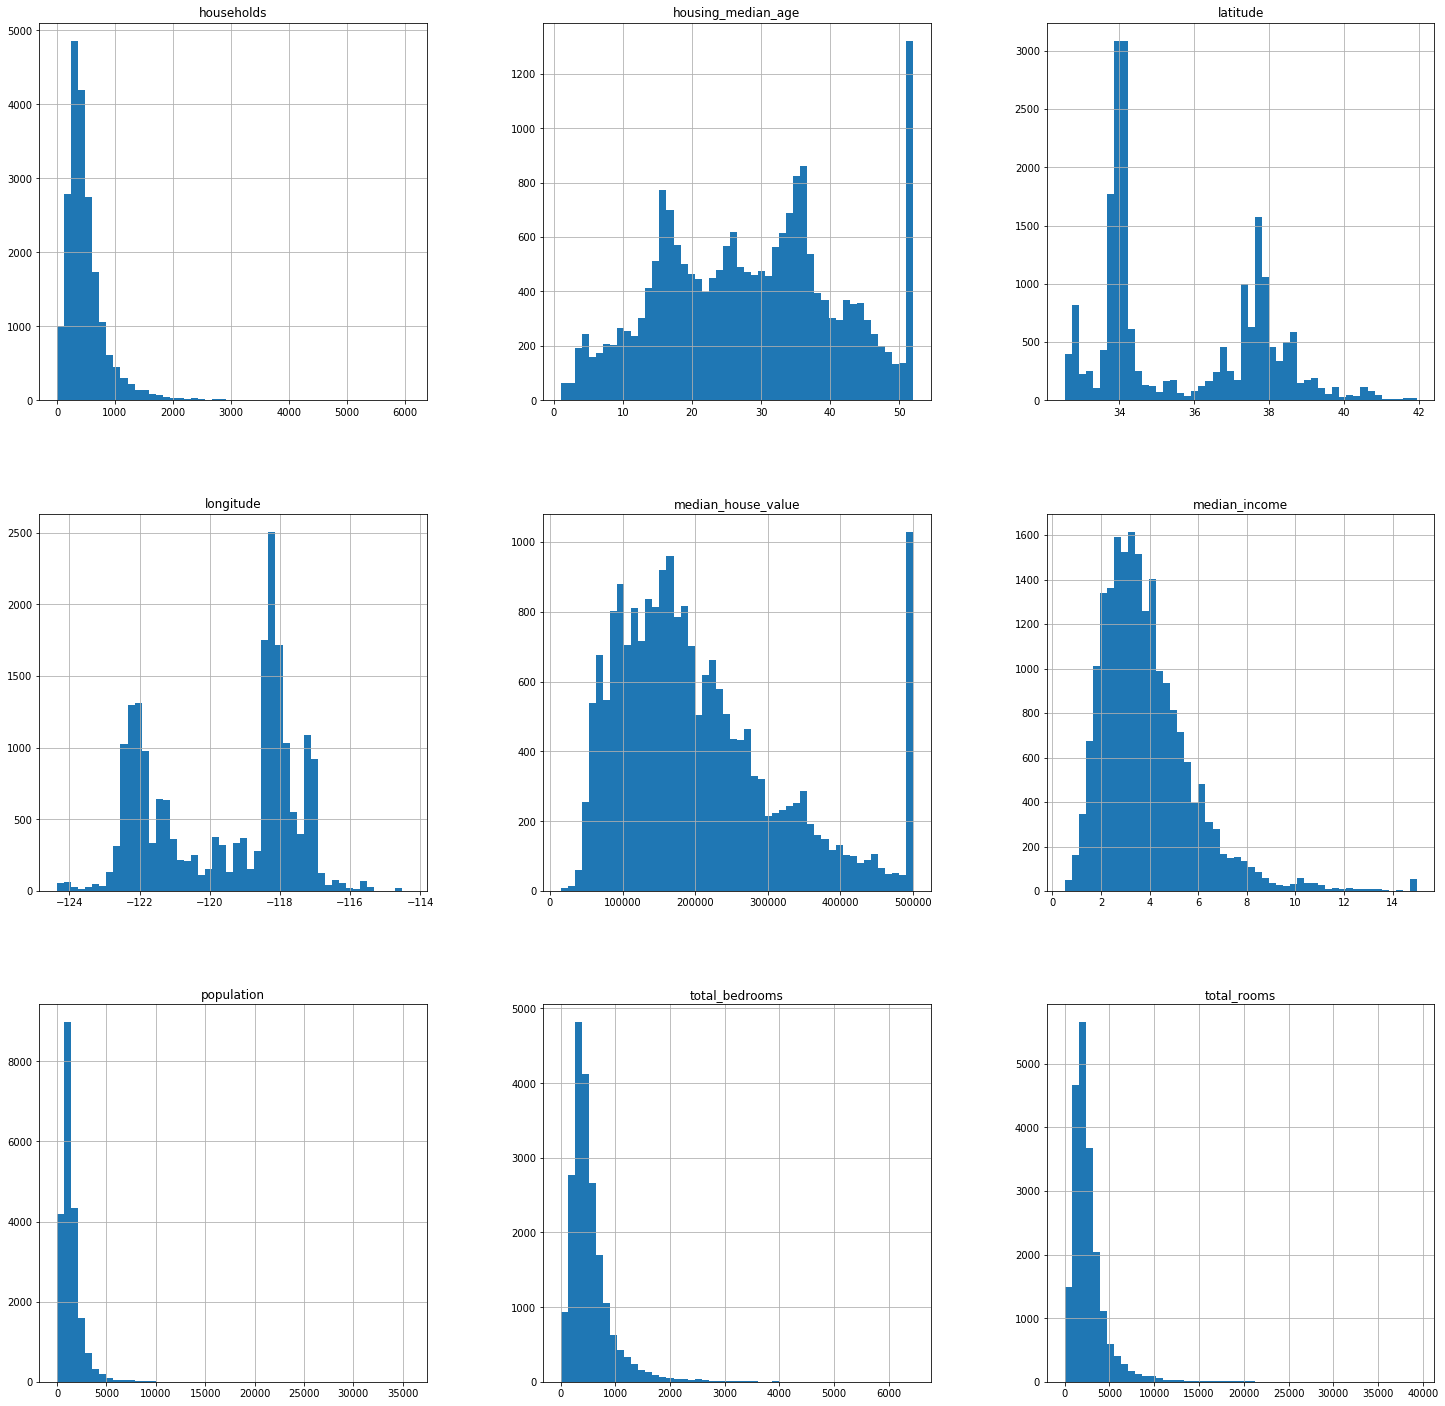

In [19]:
real.hist(figsize=(25,25),bins=50)
# A histogram is used when we have to check the  distribution of a continuous variable in a dataset
# here from this histogram we analysed that their is lot of data change rate in longitude,population,total bedrooms,total rooms.
#and in case of housing_median_age the data is not varing so much in it'starting phase but at the middle it is slightly 
# chnaging and when it comes to end the graph is incresing too much it menas their may be some outliers in the col.
# for checking outliers we will use different method.

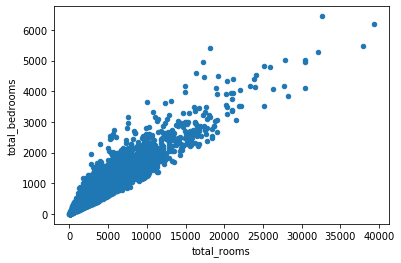

In [20]:
real.plot.scatter(x = 'total_rooms', y = 'total_bedrooms')

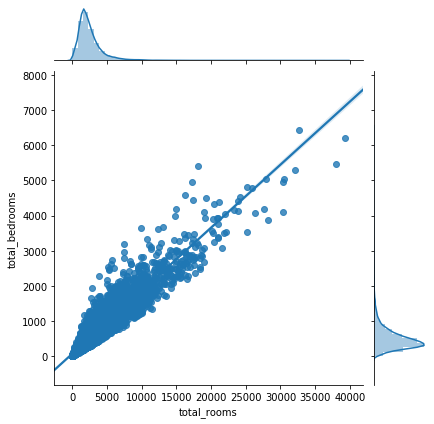

In [21]:
sns.jointplot(x='total_rooms',y='total_bedrooms',data=real,kind='reg')
#so, here we are finding he best fit line by using jointplot and kind ='reg', what this graph is showing is that: the best fit 
# line passs through those data points which are having minimum distance from that line. the line can be in any direction.

In [22]:
# sns.pairplot(real,hue='ocean_proximity',palette='rainbow')

In [23]:
# sns.pairplot(real,hue='median_house_value',palette='rainbow')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001973740EF48>,
      dtype=object)

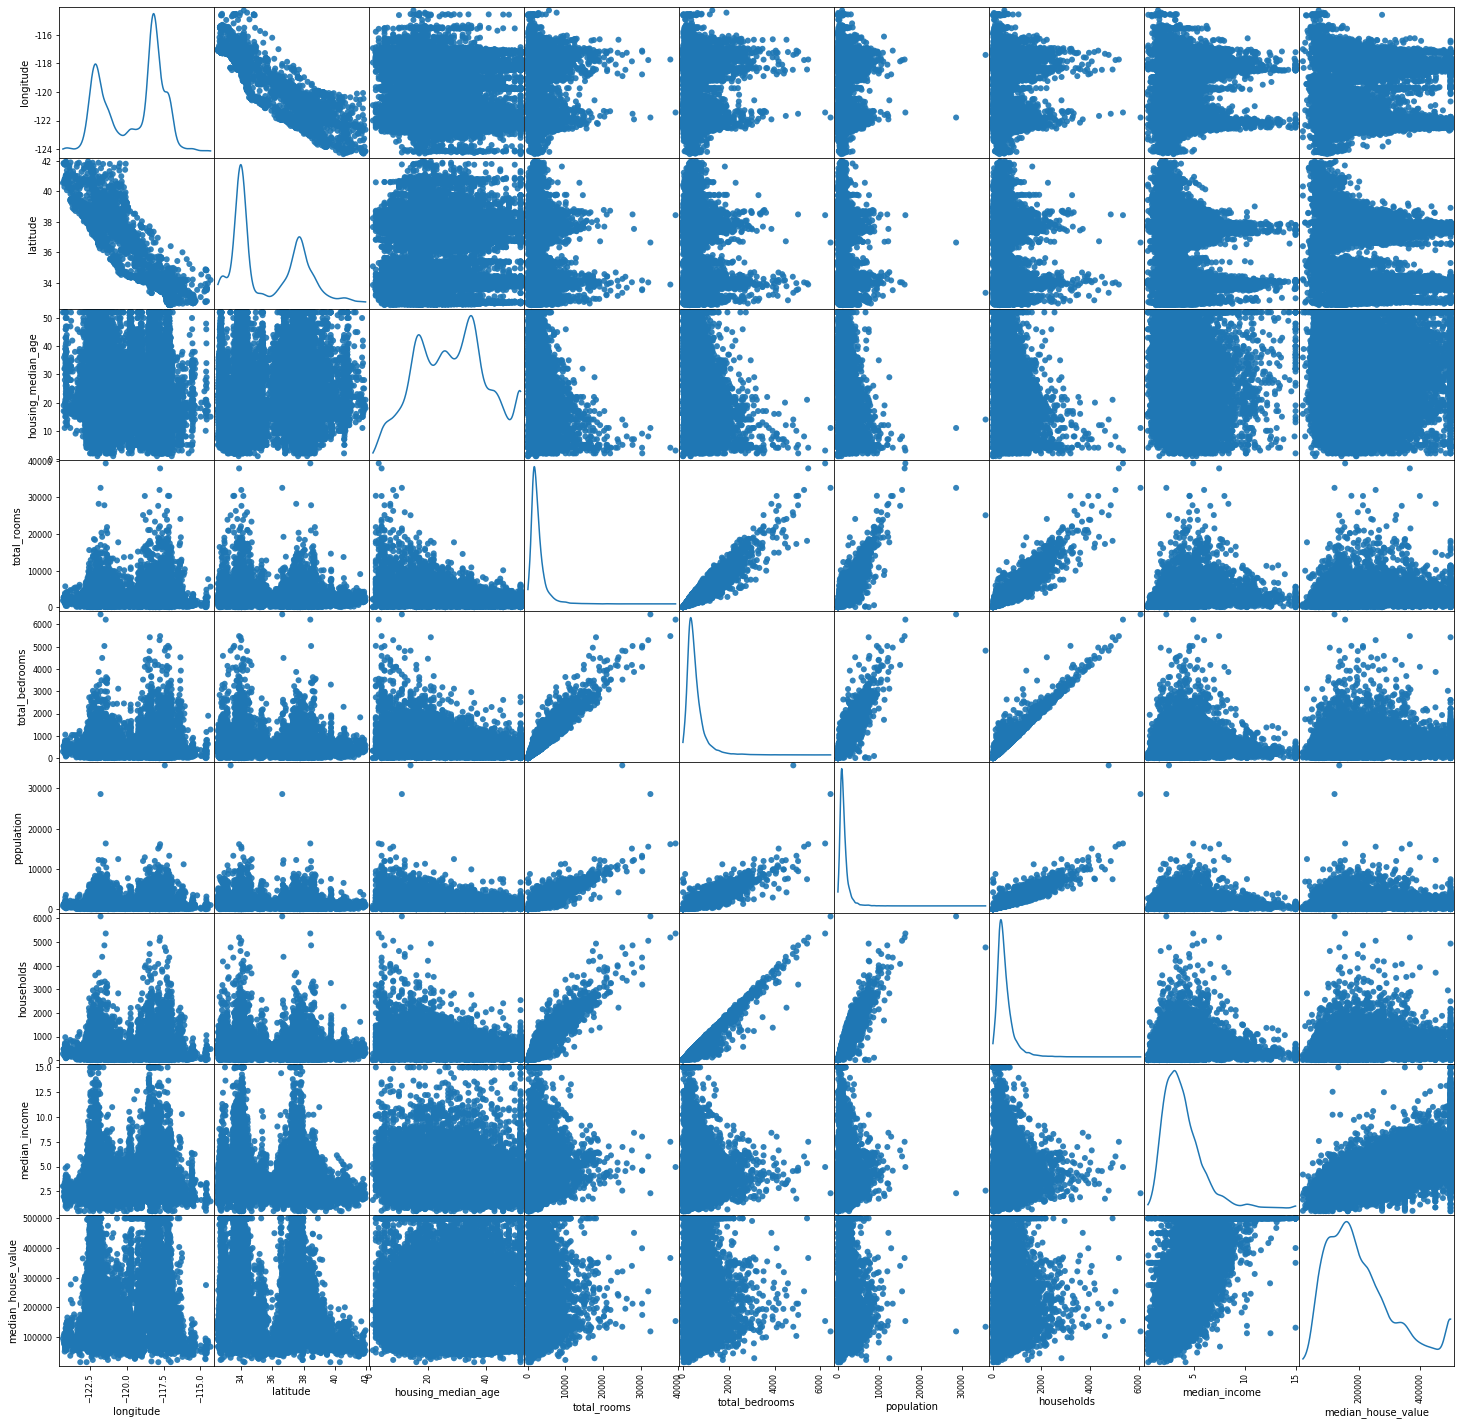

In [24]:
scatter_matrix(real,figsize=(25,25),alpha=0.9,diagonal="kde",marker="o") #understanding how one col is related to other col using scatter matrix.....
# Scatter plots shows how much one variable is affected by another or the relationship between them
# with the help of dots in two dimensions. 
# Scatter plots are very much like line graphs in the concept that they use horizontal and vertical axes to plot data points.

In [25]:
# so, from the above scatter matrix plot we can say that some columns are highly related to each other like: (median_income and housing_median_age),
# (median_house_value and housing_median_age) and many more col... we can see which box has higher density of datapoints their 
# respective coumns are highely related to each others.....

In [26]:
# Displaying the above data in the form of heatmap

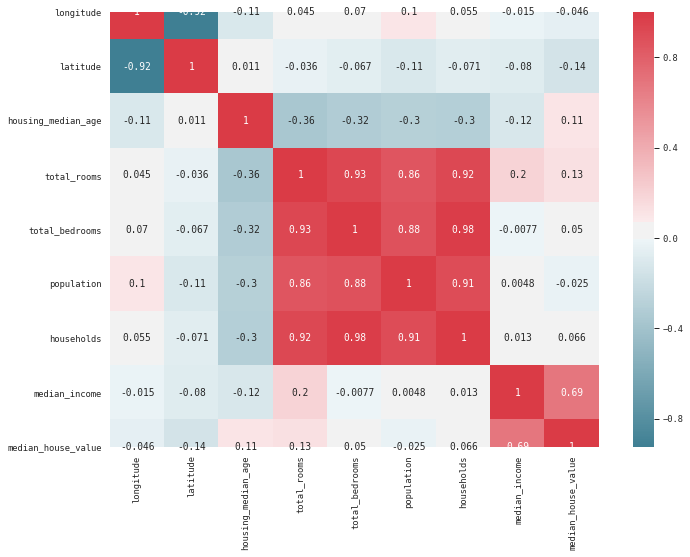

In [27]:
sns.set(context='paper',font='monospace')
real_cor_matrix=real.corr()
fig,axe=plt.subplots(figsize=(12,8))
cmap=sns.diverging_palette(220,10,center='light',as_cmap=True)
sns.heatmap(real_cor_matrix,vmax=1,square=True,cmap=cmap,annot=True)

In [28]:
# from above heatmap we understand that col total_rooms and total_bedrooms ,total_rooms and households , similarly total_bedrooms
# and populations are highly related because we can see that right side color identifier line that 0.8 and above is highly related 
# and similarly less than 0.4 are not soo much related to each other.

## Working with Outliers...

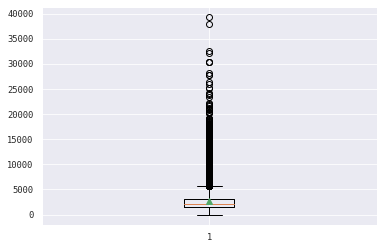

In [29]:
plt.boxplot(real["total_rooms"],showmeans=True)
plt.show()

In [30]:
# box plot is mainly use to detect outliers in any particular column. the red line in the box shows the mean vlaue of the column
# and here in this column box plot detected outliers form 23,000 because from the range of (20,000 - 40,000) the datapoints are 
# scattering too much hence they are outliers in the dataset.

In [31]:
print("mean value : ",real['total_rooms'].mean())
print("minimum value  : ",real['total_rooms'].min())
print("maximum value   : ",real['total_rooms'].max())
# as we can see here also the minimum value is 2 and respective to it maximum value is 39320 and mean is 2635 , hence if we take 
# difference datapoints from mean value to maximum vlaue theri will be soo much of differences in values so, those values are called
# outliers in the dataset.

mean value :  2635.7630813953488
minimum value  :  2
maximum value   :  39320


In [32]:
def getOutliers(dataframe,column):
    column = "total_rooms" 
    des = dataframe[column].describe()
    desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q1 = des[desPairs['25']]
    Q3 = des[desPairs['75']]
    IQR = Q3-Q1
    lowerBound = Q1-1.5*IQR #finding lower bound
    upperBound = Q3+1.5*IQR #finding upper bound
    print("(IQR = {})Outlier are anything outside this range: ({},{})".format(IQR,lowerBound,upperBound))
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]
    print("Outliers out of total = {} are \n {}".format(real[column].size,len(data[column])))
    outlierRemoved = real[~real[column].isin(data[column])] #remove the outliers from the dataframe
    return outlierRemoved

In [33]:
df_outliersRemoved = getOutliers(real,"total_rooms")

(IQR = 1700.25)Outlier are anything outside this range: (-1102.625,5698.375)
Outliers out of total = 20640 are 
 1287


## Handling Missing values in the data set....

In [34]:
real.isnull().sum() # isnull() displyes null values respective to it's columns
# here their ar 207 null values in total_bedrooms columns

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [35]:
real['total_bedrooms'].mean()
# real['total_bedrooms'].mode()
# real['total_bedrooms'].max()
# real['total_bedrooms'].min()

537.8705525375618

In [36]:
real['total_bedrooms'].fillna(value=np.mean(real['total_bedrooms']),inplace=True)
real.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

## Using LABEL ENCODER for ctegorical column " ocean_proximity "

In [37]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
real["ocean_proximity"] = labelEncoder.fit_transform(real["ocean_proximity"])
real["ocean_proximity"].value_counts()
# real["ocean_proximity"].head()
real.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


## Spliting data into tarin and test...

In [38]:
x=real.iloc[:,[0,1,2,3,4,5,6,7,8]] # independent variables(cols)
y=real.iloc[:,[-1]] # dependent variables(cols)

In [39]:
x.head(0)# Independent columns in x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [40]:
y.head(0)# Dependent column in y (Target variable)

,median_house_value


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
x_train.head() #Independent variable training dataset (80%)
# print(x_train.shape)
# print(x_train.size)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7229,-118.16,34.02,44,1218,374.0,1175,342,1.9688,0
11754,-121.17,38.76,14,2028,255.0,781,251,6.5322,1
15171,-117.07,33.02,17,2863,665.0,715,467,2.6048,0
10416,-117.61,33.63,2,4678,817.0,1970,712,6.1078,0
2504,-120.45,36.86,34,673,173.0,539,182,2.3523,1


In [43]:
x_test.head() #Independent variable testing dataset (20%)
print(x_test.shape)
print(x_test.size) # displaying shape and size of x_test(20%) data

(4128, 9)
37152


In [44]:
y_train.head() #Dependent variable training dataset (80%)
# print(y_train.shape)
# print(y_train.size)

,median_house_value
7229,173900
11754,394000
15171,148200
10416,219000
2504,66000


In [45]:
y_test.head() #Dependent variable testing dataset (20%)
print(y_test.shape)
print(y_test.size) # Displaying shape and size of y_test(20%) data

(4128, 1)
4128


# Using Linear Regression Model Algorithm*

In [46]:
# Applying Linear Regression model without Standardizing the data and checking the accuracy.....

In [47]:
from sklearn.linear_model import LinearRegression #importing linear regression from sklearn...
lm=LinearRegression() # creating object of model..

In [48]:
lm.fit(x_train,y_train)# providing traing data to model.......

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
pred=lm.predict(x_test)
pred

array([[217357.37132911],
       [279786.77212446],
       [123534.74598126],
       ...,
       [126288.19198721],
       [170986.7422147 ],
       [259148.18080454]])

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.6313077190703509

In [51]:
# appling Linear regression model with Standardizing the data.

In [52]:
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
x_train = independent_scaler.fit_transform(x_train)
x_test = independent_scaler.transform(x_test)
x_train

array([[ 0.68927355, -0.74105673,  1.22865823, ..., -0.41504394,
        -1.00252507, -0.81958448],
       [-0.81232381,  1.47779889, -1.16371978, ..., -0.65277741,
         1.39571779, -0.11846652],
       [ 1.23304137, -1.20916972, -0.92448198, ..., -0.08848697,
        -0.66828252, -0.81958448],
       ...,
       [-0.65767425,  0.88329538,  0.6704367 , ..., -0.69196424,
        -1.18514974, -0.11846652],
       [ 1.5323631 , -0.82531707, -2.04092505, ...,  2.00931498,
         0.228444  , -0.11846652],
       [ 0.92873094, -0.71765108,  0.27170703, ..., -0.51954217,
         0.08465664, -0.11846652]])

In [53]:
lm.fit(x_train,y_train)# providing traing data to model.......

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
pred=lm.predict(x_test)# after fitting into the model priniting predicted values
pred
c=pd.DataFrame(pred)
c.head()

,0
0,217357.371329
1,279786.772124
2,123534.745981
3,263713.740472
4,275710.847184


In [55]:
y_test.head() # printing original value and if we compare with predicted value in above cell some of the values are closer but in some case the difference of values is very high.
# hence, we can say that Linear Regression model gives the minimum accuracy in this case.

,median_house_value
1730,132900
10651,500001
5150,90900
8438,246900
11630,244400


In [56]:
print(np.sqrt(metrics.mean_squared_error(y_test,pred))) # printing Root Mean Squared Error (RMSE)

68897.81218638504


In [57]:
from sklearn.metrics import r2_score # checking the accuracy with with Adjusted R2
r2_score(y_test,pred)

0.6313077190703456

Here with the Linear Regression model I got the maximum accuracy of 63%

# Using Decision Tree Regression*************

In [58]:
from sklearn.tree import DecisionTreeRegressor# importing decision tree form sklearn lib....

In [59]:
dtReg = DecisionTreeRegressor(max_depth=9) # creating obj of decision tree and providing max_depth =9
dtReg.fit(x_train,y_train)# fitting training data to the model.

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [60]:
dtReg_y_pred = dtReg.predict(x_test)# after fitting into the model priniting predicted values
dtReg_y_pred
e=pd.DataFrame(dtReg_y_pred)
e.head()

,0
0,151353.846154
1,273854.007812
2,108411.562500
3,205575.229358
4,286334.297753


In [61]:
y_test.head() # printing original value and if we compare with predicted value in above cell their is a lot of difference in the predicted values and the original values,
# hence, we can say that Decision Tree Regression model is not fit in this case(dataset).

,median_house_value
1730,132900
10651,500001
5150,90900
8438,246900
11630,244400


In [62]:
print(np.sqrt(metrics.mean_squared_error(y_test,dtReg_y_pred))) # printing Root Mean Squared Error (RMSE)

59990.61236074269


In [63]:
from sklearn.metrics import r2_score# checking the accuracy with with Adjusted R2
r2_score(y_test,dtReg_y_pred)

0.7204755686580255

S0, here with Using Decision Tree Regression we got 72% accuracy which not good. Let's try with another ML algorithms.

# Using Random Forest Regressor *

In [64]:
from sklearn.ensemble import RandomForestRegressor # importing Random forest from sklearn module.

In [65]:
rfReg = RandomForestRegressor(30)# creating object of random forest 
rfReg.fit(x_train,y_train)# fitting training data in random forest

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [66]:
rfReg_y_pred = rfReg.predict(x_test)# after fitting into the model priniting predicted values
rfReg_y_pred
d=pd.DataFrame(rfReg_y_pred) # converting the data into dataframe so that, we can get the data in right format.
d.head()

,0
0,134656.666667
1,333913.433333
2,100400.000000
3,278750.033333
4,272380.033333


In [67]:
y_test.head() # printing original value and if we compare with predicted value in above cell the values are quite closer,
# hence, we can say that Random Forest Regressor model gives the maximum accuracy.

,median_house_value
1730,132900
10651,500001
5150,90900
8438,246900
11630,244400


In [68]:
print(np.sqrt(metrics.mean_squared_error(y_test,rfReg_y_pred))) # printing Root Mean Squared Error (RMSE)

49445.0936255771


In [69]:
from sklearn.metrics import r2_score # checking the accuracy with with Adjusted R2
r2_score(y_test,rfReg_y_pred)

0.8101110952124856

By using the Random Forest Regressor we gain a maximum accuracy of 81% which is good accurcy...

                                                 ****The End****